# Building Linear Regression Model using `sklearn`

Below mentioned are the steps to be followed:
1. Load the data
2. Data Preparation - train-test Split, Normalisation or Rescaling
3. Training the Model
4. Prediction
5. Evaluation

### 1. Load the data

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

### 2. Data Preparation

In [4]:
target = df['Scores']
data = df[['Hours']]

In [5]:
data

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [6]:
target

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.7, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17, 1) (17,)
(8, 1) (8,)


In [8]:
X_train.head()

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3


In [9]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


### 3. Training the model

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
print('y intercept: ',regressor.intercept_)
print('slope: ',regressor.coef_)

y intercept:  2.370815382341867
slope:  [9.78856669]


### 4. Prediction

In [12]:
y_test_pred = regressor.predict(X_test)

In [13]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


<Axes: xlabel='Scores', ylabel='Count'>

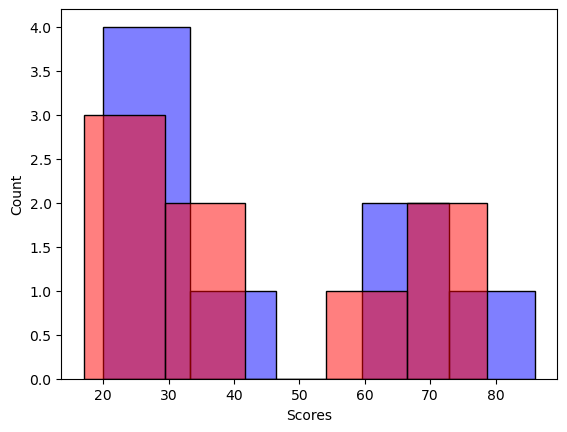

In [14]:
import seaborn as sns

sns.histplot(y_test, color='blue', alpha=0.5, bins=5)
sns.histplot(y_test_pred, color='red', alpha=0.5, bins=5)

### 5. Evaluation

In [16]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.4197278080276545
Mean Squared Error:  22.96509721270044
Root Mean Squared Error:  4.792191274636316


In [17]:
print(metrics.r2_score(y_test, y_test_pred))

0.9568211104435257
